In [1]:
import json
import pandas as pd
import load_dataset as load_dataset
import cv2
import numpy as np
import matplotlib.pyplot as plt


import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables import Keypoint, KeypointsOnImage

import torch
from torch.utils.data import Dataset, DataLoader

annotation_coco_path = "/root/dataset/anime_face_landmark_20230912/annotations/person_keypoints_Train.json"
data_path = "/root/dataset/anime_face_landmark_20230912/images"
dataset_list = load_dataset.cocokeypoints_list_converter(annotation_coco_path)
training_samples, valid_samples = load_dataset.train_test_split(dataset_list,0.05)
# train_numpy_dataset = load_dataset.AugmentFaceKeypointDataset(valid_samples,data_path,3)

Training sample instances: 297
Validation sample instances: 15


In [2]:
from model_tester import model_test
import sys
import importlib
import config

sys.path.append('./models')
MODEL_FILE = "resnet18"
module = importlib.import_module(MODEL_FILE)
model = module.LandmarkDetector().to(config.DEVICE)
model_path = "/root/Cloud/deeplearning_results/mlruns/915205068543964091/b1bad6e7ed5c4fb6afe3e3c2a5a75237/artifacts/models/model_epoch_14000.pth"
valid_image_names = [
    "images/valid_radiantLight_gitv1.5.4_0901_132440_1.jpg",
    "images/valid_radiantLight_gitv1.5.4_0901_132508_0.jpg",
    "images/valid_radiantLight_gitv1.5.4_0901_132534_1.jpg",
    "images/valid_radiantLight_gitv1.5.4_0901_132628_1.jpg"
    ]
# model_test(model_test(model,model_path,f"{config.DATASET_PATH}/images",valid_image_names,f"./"))

(196, 196, 3)
tensor([[0.0775, 0.1699, 0.0792, 0.1824, 0.0786, 0.1931, 0.0821, 0.2058, 0.0845,
         0.2184, 0.0877, 0.2298, 0.0937, 0.2418, 0.0985, 0.2540, 0.1047, 0.2669,
         0.1125, 0.2778, 0.1211, 0.2878, 0.1287, 0.2971, 0.1371, 0.3063, 0.1480,
         0.3140, 0.1568, 0.3209, 0.1664, 0.3281, 0.1814, 0.3319, 0.1948, 0.3339,
         0.2064, 0.3290, 0.2205, 0.3238, 0.2325, 0.3188, 0.2451, 0.3122, 0.2545,
         0.3030, 0.2652, 0.2906, 0.2725, 0.2809, 0.2791, 0.2701, 0.2883, 0.2566,
         0.2935, 0.2435, 0.2984, 0.2303, 0.3000, 0.2155, 0.3048, 0.2039, 0.3068,
         0.1886, 0.3092, 0.1762, 0.1012, 0.1450, 0.1187, 0.1376, 0.1309, 0.1368,
         0.1413, 0.1401, 0.1524, 0.1421, 0.1959, 0.1421, 0.2118, 0.1407, 0.2300,
         0.1431, 0.2454, 0.1460, 0.2628, 0.1540, 0.1014, 0.1811, 0.1292, 0.1748,
         0.1391, 0.1811, 0.1338, 0.1935, 0.1117, 0.1996, 0.2108, 0.1825, 0.2328,
         0.1779, 0.2607, 0.1843, 0.2453, 0.2005, 0.2166, 0.1974, 0.1705, 0.1698,
         0.166

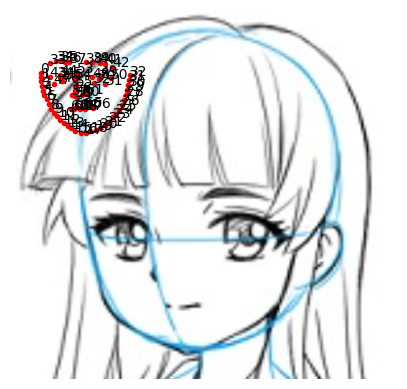

In [4]:
# def model_test(model,model_path,dataset_path,image_list,save_image_dir):
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
# for image_name in valid_image_names:
with torch.no_grad():
    # image = cv2.imread(f"/root/dataset/anime_face_landmark_20230912/images/images/AnythingV5Ink_gitv1.5.4_0901_140932_0.jpg")
    image = cv2.imread(f"/root/source/train_runner_production/スクリーンショット 2023-07-10 144115.png")
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    orig_image = image.copy()
    shape_y,shape_x,_ = orig_image.shape
    image = cv2.resize(image, (config.RESIZE, config.RESIZE))
    print(image.shape)
    image = image / 255.0
    image = np.transpose(image, (2, 0, 1))
    # image = np.transpose(image)
    image = torch.tensor(image, dtype=torch.float)
    image = image.unsqueeze(0).to(config.DEVICE)
    outputs = model(image)
    print(outputs)
    outputs = outputs.cpu().detach().numpy()
    outputs = outputs.reshape(-1, 2)
    # keypoints = keypoints.reshape(-1, 2)
    keypoints = outputs * [shape_x,shape_y]
    # plt.subplot(3, 4, i+1)
    plt.imshow(orig_image, cmap='gray')
    for p in range(keypoints.shape[0]):
        plt.plot(keypoints[p, 0], keypoints[p, 1], 'r.')
        plt.text(keypoints[p, 0], keypoints[p, 1], f"{p}")
    plt.axis('off')
    # image_name = image_name.replace("images/","")
    # plt.savefig(f"{save_image_dir}/valid_{image_name}")
    plt.show()
    plt.close()
